# K Nearest Neighbour

#KNN with Iris datasets

In [1]:
from sklearn.datasets import load_iris
x, y = load_iris().data, load_iris().target

In [2]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
x.shape, y.shape

((150, 4), (150,))

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
import matplotlib.pyplot as plt

In [6]:
x[0]

array([5.1, 3.5, 1.4, 0.2])

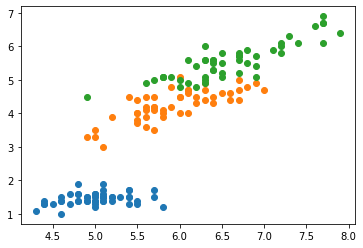

In [7]:
setosa = x[ y == 0 ]
versicolor = x[ y == 1 ]
virginica = x[ y == 2 ]

plt.scatter(setosa[:,0], setosa[:,2])
plt.scatter(versicolor[:,0], versicolor[:,2])
plt.scatter(virginica[:,0], virginica[:,2])

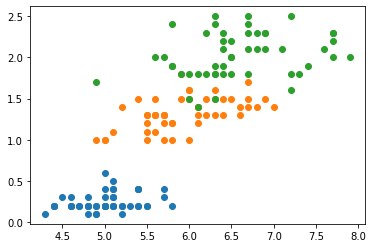

In [8]:
plt.scatter(setosa[:,0], setosa[:,3])
plt.scatter(versicolor[:,0], versicolor[:,3])
plt.scatter(virginica[:,0], virginica[:,3])

#Train test Split of data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33)

In [10]:
for i in(x_train, x_test, y_train, y_test):
    print(i.shape)

(100, 4)
(50, 4)
(100,)
(50,)


In [11]:
#Import knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier( n_neighbors=5 )

#Fitting or training our model with training dataset

In [12]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
knn_model.predict(x_test[:10])

array([2, 2, 0, 1, 0, 1, 0, 2, 0, 2])

In [14]:
y_test[:10]

array([2, 2, 0, 1, 0, 1, 0, 2, 0, 2])

In [15]:
knn_model.predict(x_test[10:40])

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 2])

In [16]:
y_test[10:40]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 2])

In [17]:
predicted = knn_model.predict(x_test)
actual = y_test

count = 0
for i,j in zip(predicted, actual):
    
    if i == j :
        count = count + 1
        
print("Percentage error is : ",( count/len(actual) )*100 )

Percentage error is :  96.0


In [18]:
knn_model.score(x_test, y_test)

0.96

In [19]:
knn_model.score(x_train, y_train)

0.99

# K Means Clustering

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [21]:
def plot_cluster(cluster):

	for one_cluster in cluster:
		x = one_cluster
		y = [ 0  for i in one_cluster ]
		y[0] = 1

		plt.scatter(x, y)

	plt.show()

In [22]:
def random_centroid(k):

	cluster = [ [] for i in range(k) ]

	for i in range(k):

		cluster[i].append( randint( min(data) , max(data) ) )

	print("First random centroids : ", cluster)
	return cluster

In [23]:
#to calculate distance
def distance(centroid, point):

	return abs(centroid - point)

In [24]:
#to calculate lowest distance for finding cluster
def find_index_of_min(li):

	lowest_index = 0
	lowest_value = li[0]

	for i in range(len(li)):

		if li[i] < lowest_value:
			lowest_value = li[i]
			lowest_index = i

	return lowest_index


In [25]:
#for updating cluster
def new_cluster(data, cluster):

	cluster = [ [ cluster[0][0] ], [ cluster[1][0] ], [ cluster[2][0] ] ]

	for point in data:

		distance_from_centroid = []
		for one_cluster in cluster:

			centroid = one_cluster[0]
			

			distance_from_centroid.append( distance(centroid, point) )

		#appending point to that cluster for which lowest distance was found
		point_in_cluster = find_index_of_min(distance_from_centroid)
		cluster[ point_in_cluster ].append( point )

	print("Whole cluster : ", cluster)
	plot_cluster(cluster)
	return cluster


In [26]:
def new_centroid(cluster):

	for i in range(1 , len( cluster ) ):

		total = 0
		for j in cluster[i]:
			total = total + j

		mean = total / len( cluster[i] )
		cluster[i][0] = mean

	print(cluster)
	plot_cluster(cluster)
	return cluster


First random centroids :  [[12], [30], [38]]
Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [30, 29, 32, 28], [38, 40]]


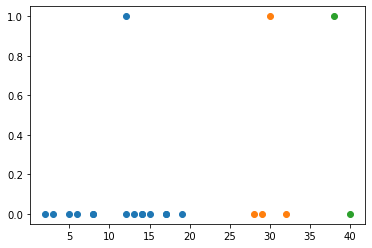

In [27]:
#Main flow of program
data = [5, 14, 29, 8, 6, 2, 14, 12, 32, 17, 40, 19, 3, 17, 13, 8, 15, 28]

k    = 3

cluster = random_centroid(k)
cluster = new_cluster(data, cluster)


[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.75, 29, 32, 28], [39.0, 40]]


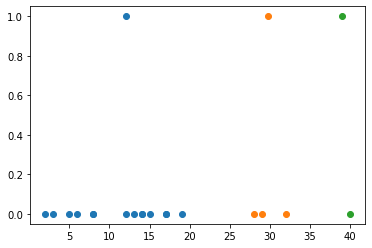

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.75, 29, 32, 28], [39.0, 40]]


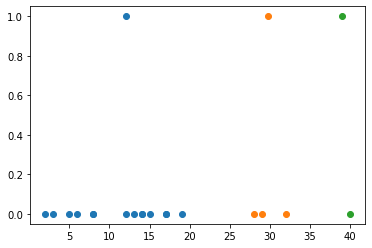

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.6875, 29, 32, 28], [39.5, 40]]


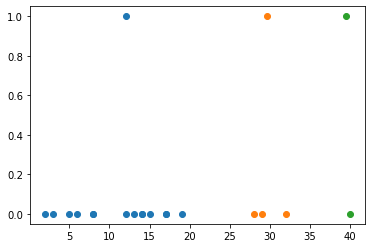

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.6875, 29, 32, 28], [39.5, 40]]


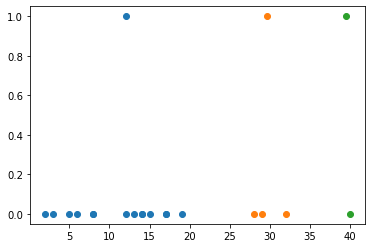

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.671875, 29, 32, 28], [39.75, 40]]


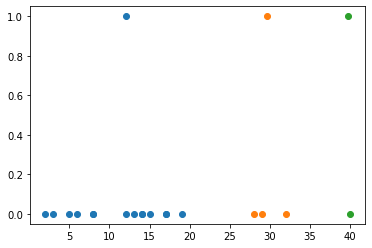

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.671875, 29, 32, 28], [39.75, 40]]


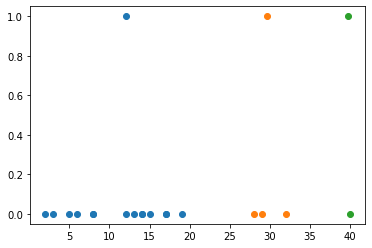

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66796875, 29, 32, 28], [39.875, 40]]


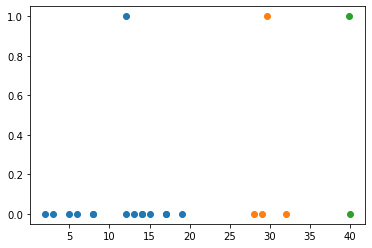

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66796875, 29, 32, 28], [39.875, 40]]


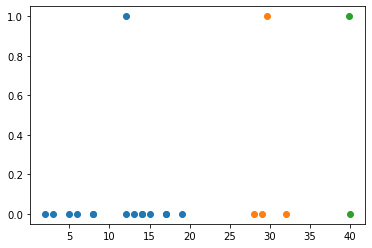

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.6669921875, 29, 32, 28], [39.9375, 40]]


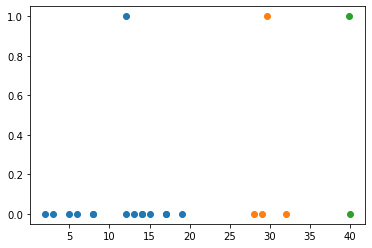

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.6669921875, 29, 32, 28], [39.9375, 40]]


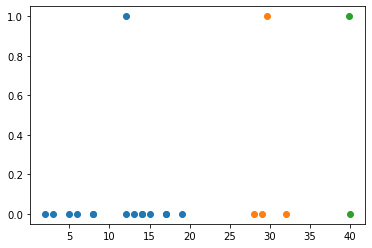

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666748046875, 29, 32, 28], [39.96875, 40]]


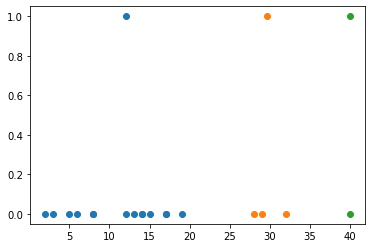

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666748046875, 29, 32, 28], [39.96875, 40]]


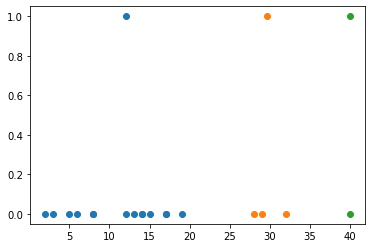

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66668701171875, 29, 32, 28], [39.984375, 40]]


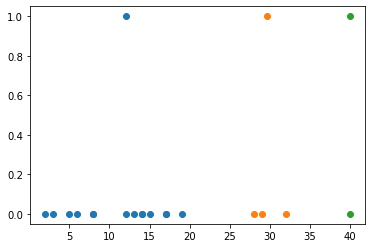

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66668701171875, 29, 32, 28], [39.984375, 40]]


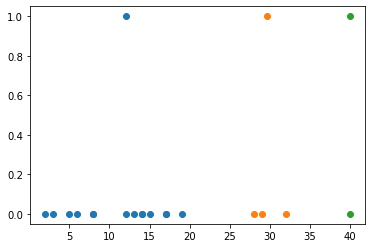

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666671752929688, 29, 32, 28], [39.9921875, 40]]


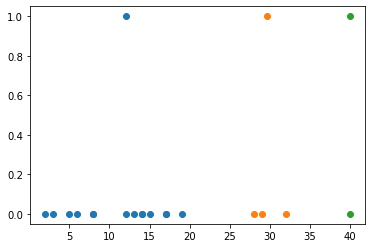

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666671752929688, 29, 32, 28], [39.9921875, 40]]


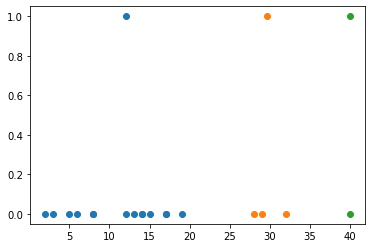

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666667938232422, 29, 32, 28], [39.99609375, 40]]


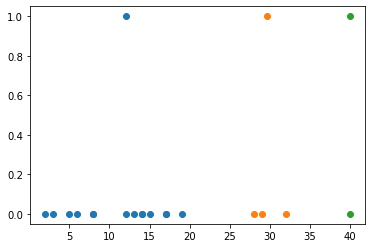

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666667938232422, 29, 32, 28], [39.99609375, 40]]


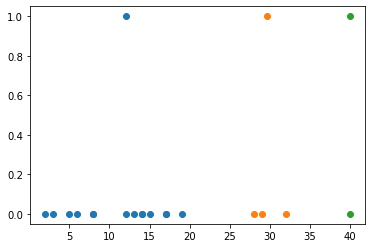

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666984558105, 29, 32, 28], [39.998046875, 40]]


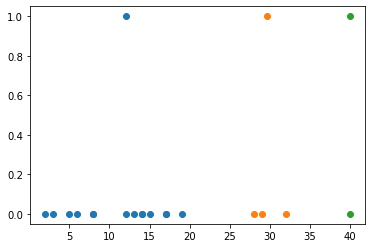

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666984558105, 29, 32, 28], [39.998046875, 40]]


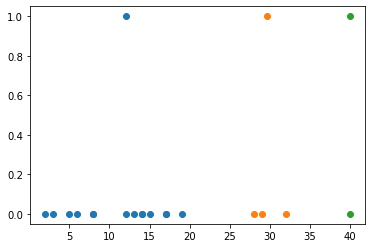

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666746139526, 29, 32, 28], [39.9990234375, 40]]


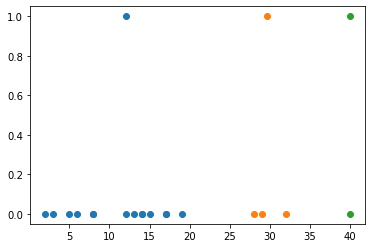

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666746139526, 29, 32, 28], [39.9990234375, 40]]


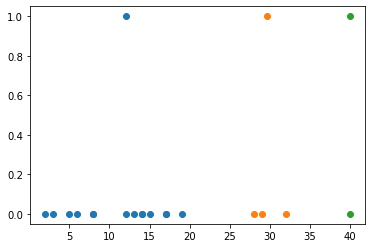

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666668653488, 29, 32, 28], [39.99951171875, 40]]


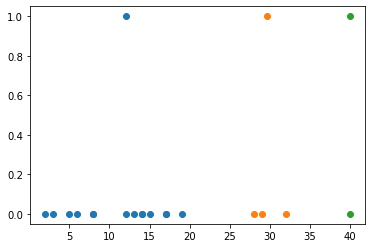

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666668653488, 29, 32, 28], [39.99951171875, 40]]


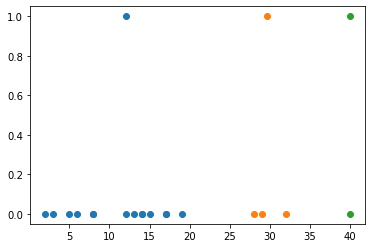

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666667163372, 29, 32, 28], [39.999755859375, 40]]


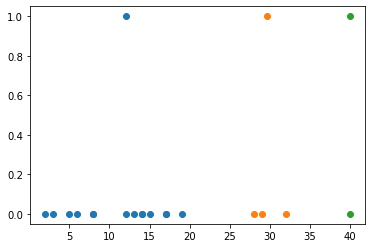

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666667163372, 29, 32, 28], [39.999755859375, 40]]


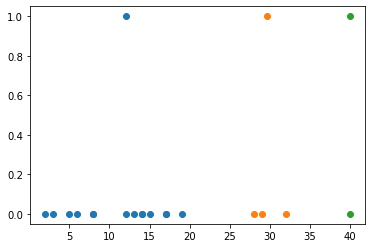

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666790843, 29, 32, 28], [39.9998779296875, 40]]


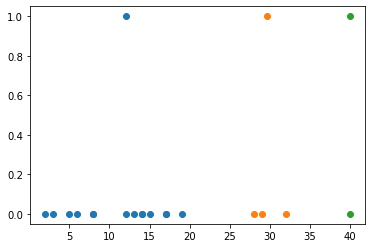

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666790843, 29, 32, 28], [39.9998779296875, 40]]


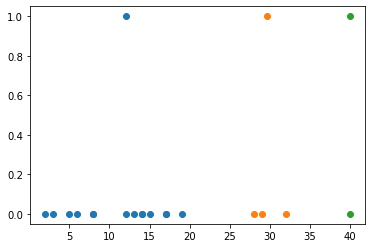

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666666977108, 29, 32, 28], [39.99993896484375, 40]]


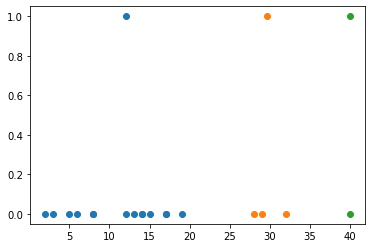

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666666977108, 29, 32, 28], [39.99993896484375, 40]]


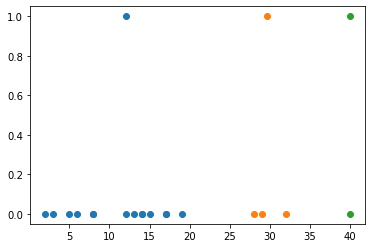

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666666744277, 29, 32, 28], [39.999969482421875, 40]]


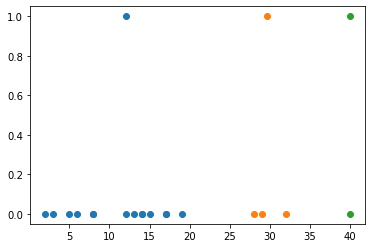

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666666744277, 29, 32, 28], [39.999969482421875, 40]]


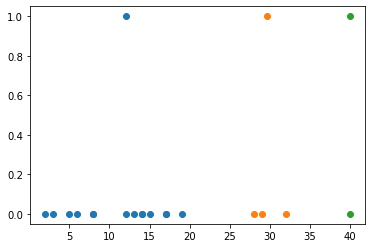

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666668607, 29, 32, 28], [39.99998474121094, 40]]


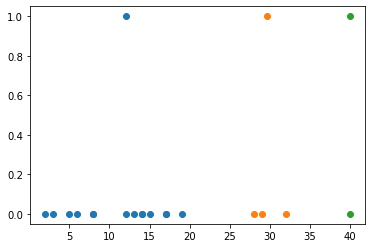

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666668607, 29, 32, 28], [39.99998474121094, 40]]


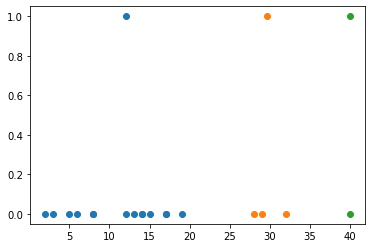

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666666671517, 29, 32, 28], [39.99999237060547, 40]]


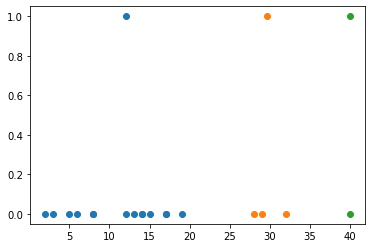

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.666666666671517, 29, 32, 28], [39.99999237060547, 40]]


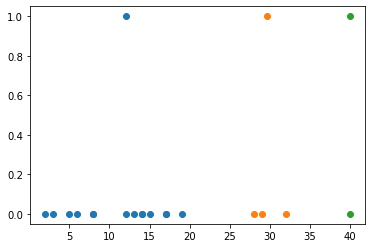

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666666788, 29, 32, 28], [39.999996185302734, 40]]


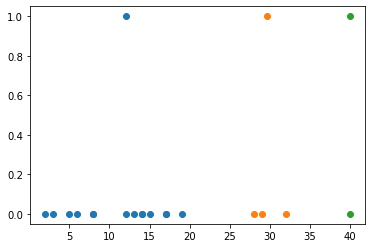

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666666788, 29, 32, 28], [39.999996185302734, 40]]


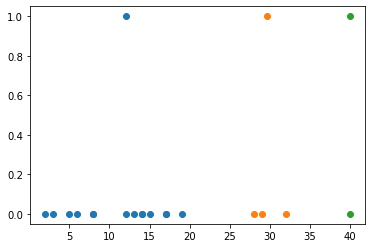

[[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666666697, 29, 32, 28], [39.99999809265137, 40]]


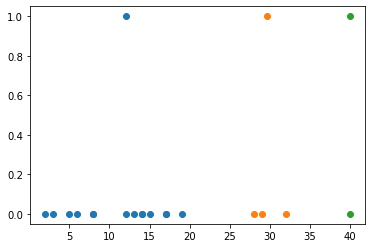

Whole cluster :  [[12, 5, 14, 8, 6, 2, 14, 12, 17, 19, 3, 17, 13, 8, 15], [29.66666666666697, 29, 32, 28], [39.99999809265137, 40]]


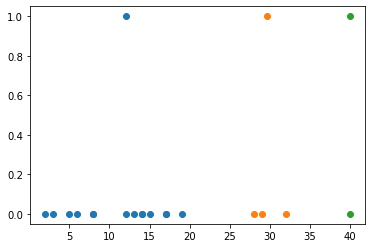

In [28]:
for i in range(20):

	cluster = new_centroid(cluster)
	cluster = new_cluster(data, cluster)


# Naiev Bayes Classifier

In [29]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [30]:
iris = datasets.load_iris()

In [31]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
X=iris.data
y=iris.target

In [33]:
X.shape

(150, 4)

In [34]:
y.shape

(150,)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [36]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()

In [37]:
nv.fit(X_train,y_train)

GaussianNB()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred = nv.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

1.0

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Decision Tree

In [43]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data and store it into pandas Dataframe objects
iris = load_iris()
X = iris.data
y = iris.target

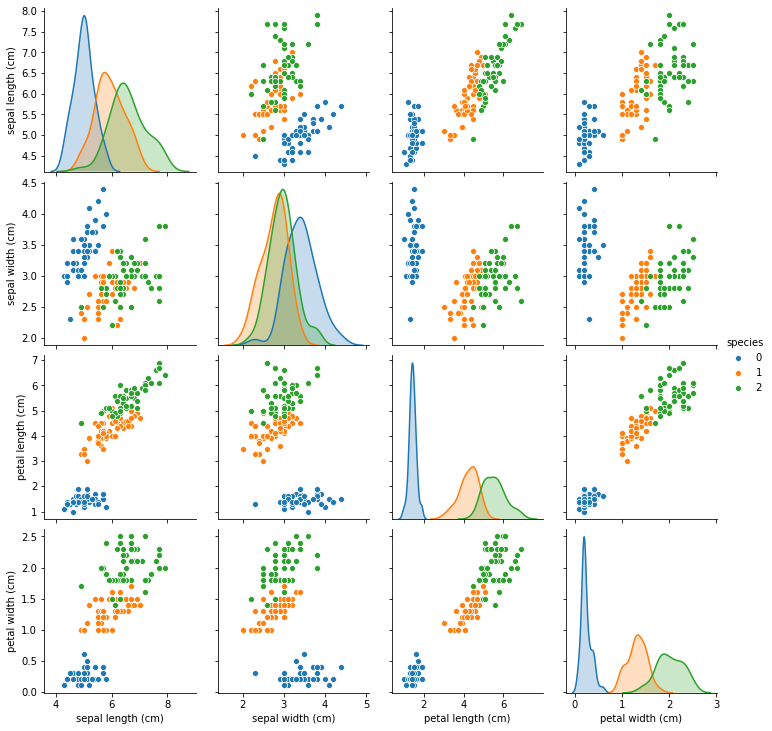

In [44]:
import seaborn as sns

data = pd.DataFrame(X, columns=iris.feature_names)
data["species"] = y

sns.pairplot(data, hue="species")

In [45]:
# Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [46]:
from sklearn.tree import export_graphviz


export_graphviz(
            tree,
            out_file = "iris-graph.dot",
            feature_names = list(data.columns)[:-1],
            class_names = iris.target_names,
            filled = True,
            rounded = True)

In [47]:
!cat iris-graph.dot

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [49]:
tree.score(X,y)

0.31886477462437396

# Random Forest

In [50]:
# Pandas is used for data manipulation
import pandas as pd

In [51]:
# Read in data and display first 5 rows
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


# Identify Anomalies/ Missing Data

In [52]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


# Data Preparation

In [53]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

In [54]:
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [55]:
# Use numpy to convert to arrays
import numpy as np

In [56]:
# Labels are the values we want to predict
labels = np.array(features['actual'])

In [57]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

In [58]:
# Saving feature names for later use
feature_list = list(features.columns)

In [59]:
# Convert to numpy array
features = np.array(features)

# Training and Testing Sets

In [60]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [61]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [62]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


# Establish Baseline

In [63]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

In [64]:
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


# Train Model

In [65]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [67]:
# Train the model on training data
rf.fit(train_features, train_labels);

# Make Predictions on the Test Set

In [68]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [69]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [70]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


# Determine Performance Metrics

In [71]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [72]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


# Variable Importances

In [73]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [74]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [75]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [76]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [77]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [78]:
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [79]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [80]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [81]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.92 degrees.


In [82]:
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

In [83]:
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.76 %.


# Visualizations

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# Set the style
plt.style.use('fivethirtyeight')

In [86]:
# list of x locations for plotting
x_values = list(range(len(importances)))

<BarContainer object of 17 artists>

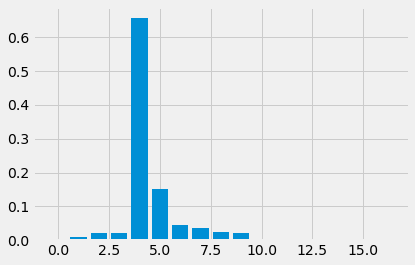

In [87]:
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

([<matplotlib.axis.XTick at 0x1cfd3737700>,
 [Text(0, 0, 'year'),
  Text(0, 0, 'month'),
  Text(0, 0, 'day'),
  Text(0, 0, 'temp_2'),
  Text(0, 0, 'temp_1'),
  Text(0, 0, 'average'),
  Text(0, 0, 'forecast_noaa'),
  Text(0, 0, 'forecast_acc'),
  Text(0, 0, 'forecast_under'),
  Text(0, 0, 'friend'),
  Text(0, 0, 'week_Fri'),
  Text(0, 0, 'week_Mon'),
  Text(0, 0, 'week_Sat'),
  Text(0, 0, 'week_Sun'),
  Text(0, 0, 'week_Thurs'),
  Text(0, 0, 'week_Tues'),
  Text(0, 0, 'week_Wed')])

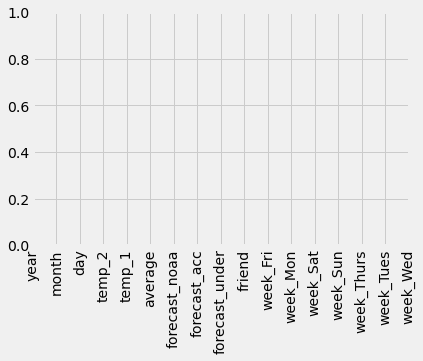

In [88]:
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

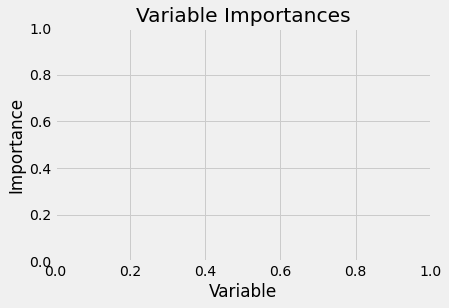

In [89]:
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [90]:
# Use datetime for creating date objects for plotting
import datetime

In [91]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

In [92]:
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [93]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

In [94]:
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

In [95]:
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

In [96]:
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

In [97]:
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

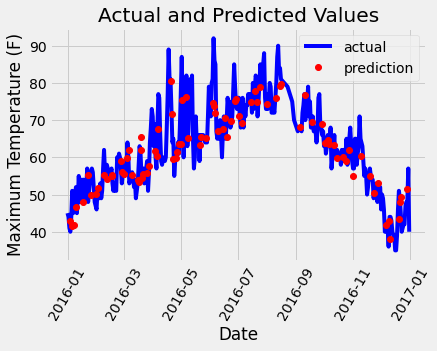

In [98]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

# Linear Regression

#Linear Regression with Boston House Pricing

In [99]:
from sklearn.datasets import load_boston
data = load_boston()

In [100]:
x, y = data.data, data.target

In [101]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [102]:
d = load_boston()

In [103]:
import pandas as pd
data = pd.DataFrame( d.data, columns=d.feature_names)

In [104]:
data["MEDV"] = d.target

In [105]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Seperating features into X and target into Y

In [106]:
X = data[ ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'] ]
y = data[ "MEDV" ]

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=9 ) ##random state has no sense it can be any value till 2^32-1

In [108]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.head())
    print(" "*40)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
217  0.07013   0.0  13.89   0.0  0.550  6.642  85.1  3.4211  5.0  276.0   
25   0.84054   0.0   8.14   0.0  0.538  5.599  85.7  4.4546  4.0  307.0   
235  0.33045   0.0   6.20   0.0  0.507  6.086  61.5  3.6519  8.0  307.0   
62   0.11027  25.0   5.13   0.0  0.453  6.456  67.8  7.2255  8.0  284.0   
6    0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605  5.0  311.0   

     PTRATIO       B  LSTAT  
217     16.4  392.78   9.69  
25      21.0  303.42  16.51  
235     17.4  376.75  10.88  
62      19.7  396.90   6.73  
6       15.2  395.60  12.43  
                                        
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
464   7.83932   0.0  18.10   0.0  0.655  6.209  65.4  2.9634  24.0  666.0   
419  11.81230   0.0  18.10   0.0  0.718  6.824  76.5  1.7940  24.0  666.0   
277   0.06127  40.0   6.41   1.0  0.447  6.826  27.6  4.8628   4.0  254.0   
491   0.10574   0.0 

In [109]:
y_test.head()

464    21.4
419     8.4
277    33.1
491    13.6
337    18.5
Name: MEDV, dtype: float64

# Importing Linear regression

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
model = LinearRegression()

In [112]:
model.fit(X_train , y_train)

LinearRegression()

In [113]:
import numpy as np
np.array(model.coef_)

array([-1.10653650e-01,  4.35058932e-02,  5.27220034e-02,  2.23444360e+00,
       -1.58398648e+01,  3.89237897e+00,  1.01476364e-03, -1.32124422e+00,
        2.84930457e-01, -1.15585903e-02, -9.02839713e-01,  8.45742872e-03,
       -5.27607786e-01])

In [114]:
data.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [115]:
actual = y_test.iloc[:10]
predicted = model.predict(X_test.iloc[:10])

In [116]:
for i,j in zip(actual,predicted):
    
    print(i," : ",j)

21.4  :  20.553001129739396
8.4  :  15.095787678477468
33.1  :  34.082251923458045
13.6  :  14.502212697945588
18.5  :  19.30350061636765
23.8  :  23.25307471987277
35.1  :  34.647798268488636
36.2  :  27.904902929656068
17.7  :  20.48931691271693
15.6  :  16.38080868243525


# RMS Value

In [117]:
from math import sqrt

In [118]:
#python way

sum_of_squared_error = 0
for i,j in zip(actual,predicted):
    
    error = i - j
    squared_error = error**2
    
    sum_of_squared_error = sum_of_squared_error + squared_error
    
mean_squared_error = sum_of_squared_error / len(actual)

root_mean_squared_error = sqrt(mean_squared_error)
print(root_mean_squared_error)

3.5451036609390636


# RMS Value of errors

In [119]:
import matplotlib.pyplot as plt

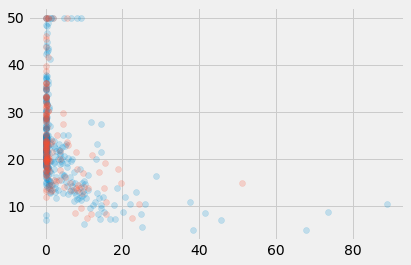

In [120]:
plt.scatter(X_train["CRIM"], y_train, alpha=.2)
plt.scatter(X_test["CRIM"], y_test, alpha=.2)

In [121]:
model.score(X_test, y_test)

0.7826126074271011

# Statistical for one variable

# Mean and Standard Deviation and Variance
# #Mean: Central Tendency, average : Sum of numbers / total numbers

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
a = np.array([80, 85, 82, 90, 89, 89, 80, 85, 86])
b = np.array([60, 100, 80, 85, 75, 90, 70, 74, 86, 90, 60])

In [124]:
a.mean(), b.mean()

(85.11111111111111, 79.0909090909091)

In [126]:
a.std(), b.std()

(3.603838831161523, 12.109009008732041)

In [127]:
marks = np.random.normal(80, 20, 100)
marks

array([128.09086519,  79.78415405,  90.6270682 ,  67.4410839 ,
        82.29094285,  56.19861066,  70.10987974,  64.45034776,
       101.83135935,  63.21936552,  50.11952516,  95.23138034,
       116.08181341,  79.32725383,  72.65664611, 111.69064041,
        52.95416172,  80.86756611,  67.30771765, 110.73239547,
        67.94243312,  86.69719482,  65.8359551 ,  70.59145371,
        73.08833252,  79.9017598 ,  87.17715044, 118.01900082,
       100.83366254,  88.54832582,  74.3002099 , 108.53718051,
        93.34164429,  70.49897026,  84.67346566,  90.06330956,
       102.33517776,  78.98218361,  85.67058283,  86.43556351,
        89.78393994,  99.64287713,  94.03373975,  62.37252371,
       100.34085824,  68.14027402,  75.50603327,  92.95199693,
       105.62806125, 136.44816521,  79.49820676,  93.34172011,
        50.66975003,  86.08824238,  83.58473073,  69.18003356,
        63.14765993, 111.68181923,  92.83517562,  80.35730158,
       110.07812666,  95.84963537,  86.4487351 ,  63.66

In [128]:
marks.mean()

82.57403006802329

In [129]:
marks = np.random.normal(80, 20, 1000)

(array([  1.,   2.,   9.,  14.,  31.,  54.,  64.,  94., 114., 121., 123.,
        124.,  95.,  67.,  47.,  18.,  11.,   7.,   3.,   1.]),
 array([ 13.15351607,  19.82048935,  26.48746262,  33.1544359 ,
         39.82140918,  46.48838245,  53.15535573,  59.82232901,
         66.48930228,  73.15627556,  79.82324884,  86.49022211,
         93.15719539,  99.82416867, 106.49114194, 113.15811522,
        119.8250885 , 126.49206178, 133.15903505, 139.82600833,
        146.49298161]),
 <a list of 20 Patch objects>)

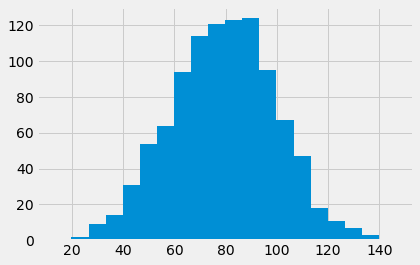

In [130]:
plt.hist(marks, bins=20)

In [131]:
marks[ (marks < 100) & (marks > 60) ].size

672

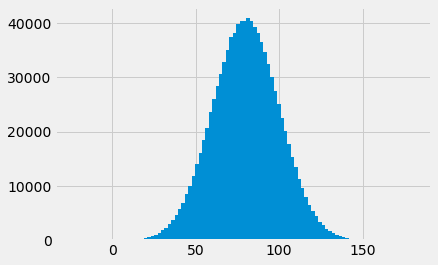

In [132]:
marks = np.random.normal(80, 20, 1000000)
_ = plt.hist(marks, bins=100)

In [133]:
marks[ (marks < 100) & (marks > 60) ].size

682869

# Parametric hypothesis
# Non Parametric hypothesis

In [134]:
data = pd.read_csv("headbrain.csv")

In [135]:
data = data.drop( ["Gender", "Age Range"], axis=1 )

In [136]:
data.sample(5)

,Head Size(cm^3),Brain Weight(grams)
235,3352,1170
122,4488,1440
227,4204,1380
58,3935,1330
7,3559,1255


In [137]:
data.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


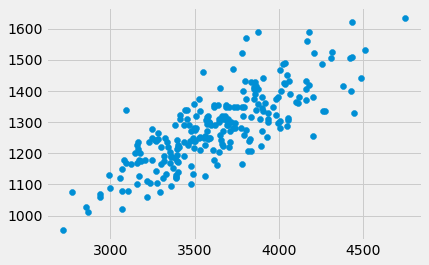

In [138]:
plt.scatter(data["Head Size(cm^3)"], data["Brain Weight(grams)"])

In [139]:
data.shape

(237, 2)

# Seperate data into x and y

In [140]:
x, y = np.array(data["Head Size(cm^3)"]), np.array(data["Brain Weight(grams)"])

In [141]:
x

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [142]:
x = x.reshape(-1, 1)  ##reshaping in 2 dimension
x

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

# Deciding and importing our model

In [143]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

# Splitting our model

In [144]:
x, y = data["Head Size(cm^3)"], data["Brain Weight(grams)"]

In [145]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=3)

In [146]:
for i,j in zip(x_train, y_train):
    print(i, j)
    

[6.3 2.9 5.6 1.8] 28.7
[5.7 3.8 1.7 0.3] 13.9
[6.7 3.1 4.7 1.5] 24.0
[5.6 2.5 3.9 1.1] 22.2
[4.8 3.  1.4 0.1] 22.9
[4.7 3.2 1.3 0.2] 18.9
[5.9 3.2 4.8 1.8] 19.9
[4.6 3.1 1.5 0.2] 20.2
[5.7 3.  4.2 1.2] 17.8
[6.  2.2 4.  1. ] 17.1
[5.4 3.  4.5 1.5] 13.6
[6.7 3.3 5.7 2.5] 24.3
[5.1 3.8 1.6 0.2] 18.9
[6.2 2.9 4.3 1.3] 17.2
[5.7 4.4 1.5 0.4] 20.6
[6.8 3.2 5.9 2.3] 22.0
[5.7 2.5 5.  2. ] 48.3
[6.3 2.8 5.1 1.5] 36.0
[5.1 3.4 1.5 0.2] 50.0
[4.5 2.3 1.3 0.3] 22.5
[4.9 3.1 1.5 0.1] 20.7
[6.  3.  4.8 1.8] 22.8
[6.1 2.8 4.7 1.2] 21.6
[6.4 2.8 5.6 2.1] 26.5
[7.1 3.  5.9 2.1] 19.5
[6.7 3.1 5.6 2.4] 21.4
[5.5 2.4 3.8 1.1] 23.9
[6.  3.4 4.5 1.6] 5.0
[4.7 3.2 1.6 0.2] 7.2
[6.7 2.5 5.8 1.8] 17.8
[6.5 3.2 5.1 2. ] 11.0
[5.1 2.5 3.  1.1] 20.6
[6.9 3.1 5.1 2.3] 27.0
[4.4 2.9 1.4 0.2] 26.2
[6.2 3.4 5.4 2.3] 36.4
[5.4 3.9 1.3 0.4] 16.8
[4.8 3.4 1.6 0.2] 17.2
[5.6 2.8 4.9 2. ] 43.5
[6.1 3.  4.6 1.4] 21.2
[6.7 3.  5.2 2.3] 50.0
[6.4 3.1 5.5 1.8] 12.7
[7.6 3.  6.6 2.1] 21.0
[7.4 2.8 6.1 1.9] 12.7
[6.  2.9 4.5 

In [147]:
for i in x_train, x_test, y_train, y_test:
    print(i.shape)

(100, 4)
(50, 4)
(354,)
(152,)


In [148]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=3)

In [150]:
for i,j in zip(x_test, y_test):
    print(i," : ", j)

[6.5 3.  5.5 1.8]  :  21.4
[6.2 2.8 4.8 1.8]  :  8.4
[4.6 3.6 1.  0.2]  :  33.1
[6.3 2.3 4.4 1.3]  :  13.6
[4.4 3.  1.3 0.2]  :  18.5
[5.2 2.7 3.9 1.4]  :  23.8
[5.  3.4 1.6 0.4]  :  35.1
[6.5 3.  5.8 2.2]  :  36.2
[4.9 3.6 1.4 0.1]  :  17.7
[7.2 3.2 6.  1.8]  :  15.6
[4.6 3.4 1.4 0.3]  :  16.6
[5.  2.  3.5 1. ]  :  23.7
[5.  3.6 1.4 0.2]  :  17.6
[6.7 3.  5.  1.7]  :  50.0
[5.  3.5 1.3 0.3]  :  13.3
[5.7 2.8 4.1 1.3]  :  34.7
[5.1 3.7 1.5 0.4]  :  16.1
[6.4 2.9 4.3 1.3]  :  21.7
[5.1 3.8 1.9 0.4]  :  35.4
[5.5 2.6 4.4 1.2]  :  17.1
[6.9 3.2 5.7 2.3]  :  23.1
[6.3 2.5 4.9 1.5]  :  7.4
[5.1 3.5 1.4 0.2]  :  21.9
[5.9 3.  4.2 1.5]  :  15.6
[6.1 2.8 4.  1.3]  :  23.9
[6.  2.7 5.1 1.6]  :  50.0
[7.3 2.9 6.3 1.8]  :  22.3
[5.5 2.4 3.7 1. ]  :  15.0
[5.6 2.9 3.6 1.3]  :  19.4
[7.9 3.8 6.4 2. ]  :  22.2
[6.5 2.8 4.6 1.5]  :  9.5
[4.9 3.1 1.5 0.2]  :  13.5
[5.4 3.7 1.5 0.2]  :  19.7
[6.6 3.  4.4 1.4]  :  20.2
[5.2 4.1 1.5 0.1]  :  21.5
[5.  3.2 1.2 0.2]  :  15.4
[5.6 3.  4.1 1.3]  :  31.5
[6.2

# SVM

In [151]:
import numpy as np
from matplotlib import pyplot as plt

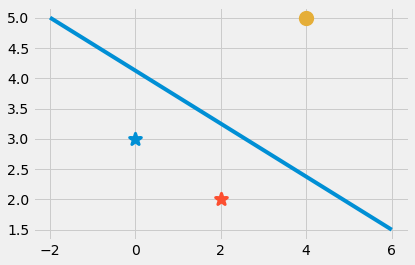

In [152]:
a = np.array([[0,3,-1],
              [2,2,-1],
              [2, 5, -1],
              [2, 4, -1],
              [4, 5, -1]
             ])
b = np.array([-1,-1,1,1,1])
for i, sample in enumerate(a):
    if i < 2:
        plt.scatter(sample[0], sample[1], s=150, marker='*', linewidths=3)
else:
        plt.scatter(sample[0], sample[1], s=150, marker='o', linewidths=3)
plt.plot([-2,6],[5,1.5])

# PCA - Principal Component Analysis

In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [154]:
# Here we are using inbuilt dataset of scikit learn 
from sklearn.datasets import load_breast_cancer 

In [155]:
# instantiating 
cancer = load_breast_cancer()

In [156]:
# creating dataframe 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 

In [157]:
# checking head of dataframe 
df.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()

In [160]:
# fitting 
scalar.fit(df) 
scaled_data = scalar.transform(df)

In [161]:
# Importing PCA 
from sklearn.decomposition import PCA

In [162]:
# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
x_pca.shape 

(569, 2)

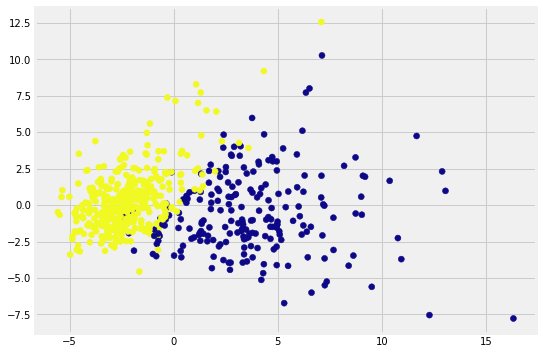

In [163]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma') 

Text(0, 0.5, 'Second Principal Component')

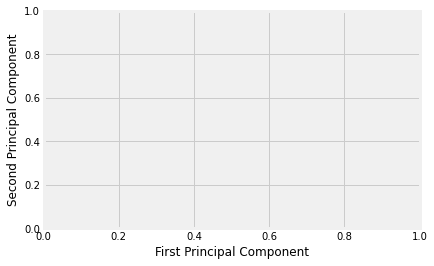

In [164]:
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')

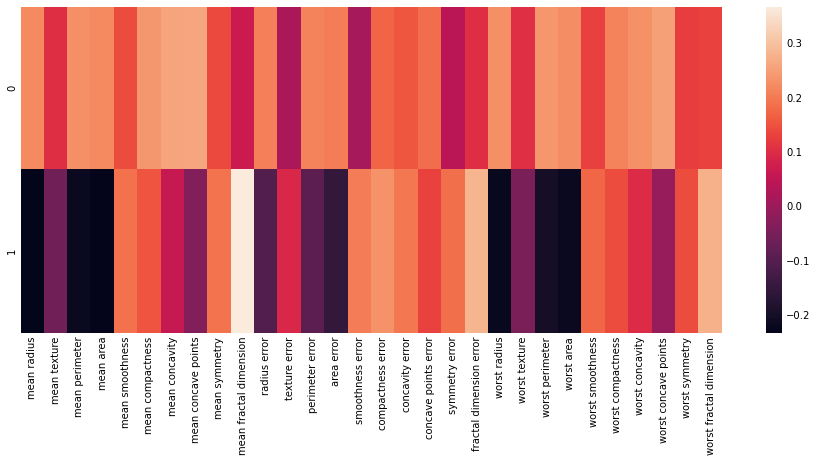

In [165]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names']) 
  
plt.figure(figsize =(14, 6)) 
  
# plotting heatmap 
sns.heatmap(df_comp) 

# Gradient Descendent method

In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                  np.sum(Y_pred - Y)))
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                  np.sum((Y_pred - Y) * self.X)))
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
        return Y_pred
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    #def predict(self, b, yi):
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()

   

In [176]:
 def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])
    regressor = Linear_Regression(X, Y)
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
    
#original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                   regressor.get_current_accuracy(Y_pred))
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
                
#final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

#plot to verify cost fuction decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()
    
  # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])

<ipython-input-173-e23013d34b0c>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??*
200 epochs elapsed
Current accuracy is : 0.9876439126076564
Do you want to stop (y/*)??y


<ipython-input-173-e23013d34b0c>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-176-1cae6d38189b>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


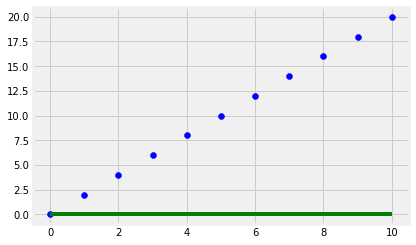

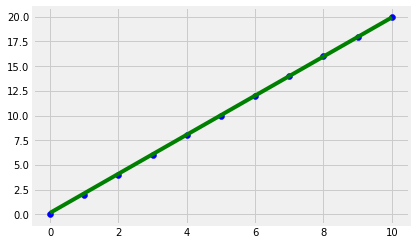

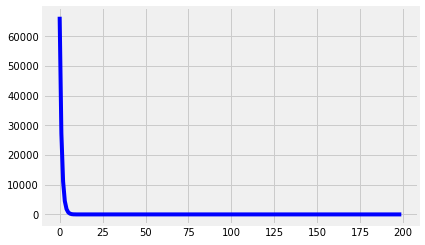

In [177]:
if __name__ == '__main__':
    main()